Model: Gaussian1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
        amplitude             mean              stddev      
    ------------------ ------------------ ------------------
    0.7769031470325262 -4.632004788302857 0.1576985650786045


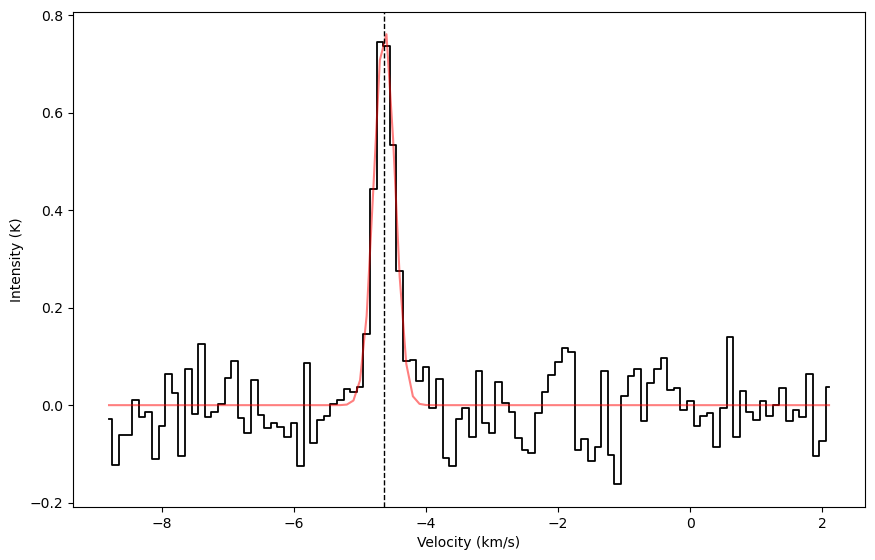

In [2]:
from astropy.modeling.models import Gaussian1D
import matplotlib.pyplot as plt
from astropy.modeling.fitting import LevMarLSQFitter
from astropy.io import fits
import numpy as np

c13 = fits.getdata('PolS_C18O_all_c30_v10_fullcube_vcut.fits')

v13 = np.arange(-8.8, 2.2, 0.1)

px = [140.95088806, 128.50305051, 125.44240833, 110.7130185, 109.25533973]
py = [55.38178547, 50.23857511, 42.03487215, 42.55337539, 46.74839184]


nra = round(px[4]) #정수로 변환 
ndec = round(py[4])


fig = plt.figure(figsize=(8.8, 5.5))
ax = plt.axes([.09, .09, 0.9, 0.9])
ax.plot(v13[:], c13[:, ndec, nra], drawstyle='steps-mid', linewidth=1.3, color='k')
ax.grid(False)


x = v13
y = c13[:, ndec, nra]
m1 = Gaussian1D(1.6, -4.5, 0.3)


fitter = LevMarLSQFitter()
fit = fitter(m1, x, y)


ax.plot(v13[:], fit(v13), color='r', lw=1.5, alpha=0.5)
ax.axvline(x=fit.mean.value, ymin=0, ymax=1, linestyle='--', lw=1, c='k')
ax.set_xlabel('Velocity (km/s)')
ax.set_ylabel('Intensity (K)')

print(fit)

In [27]:
from astropy.wcs import WCS
px, py = wcs.wcs_world2pix(obscen_deg[0], obscen_deg[1], 0)


    # convert hh:mm:ss into degrees
def convHMS(ra):
    try:
        sep1 = ra.find(':')
        hh = int(ra[0:sep1])
        sep2 = ra[sep1 + 1:].find(':')
        mm = int(ra[sep1 + 1:sep1 + sep2 + 1])
        ss = float(ra[sep1 + sep2 + 2:])
    except:
         raise
    else:
         pass
         return (hh * 15. + mm / 4. + ss / 240.)
# Convert +DD:MM:SS.SSS into Degrees
def convDMS(dec):
    Csign = dec[0]
    if Csign == '-':
        sign = -1.
        off = 1
    elif Csign == '+':
        sign = 1.
        off = 1
    else:
        sign = 1.
        off = 0
    try:
        sep1 = dec.find(':')
        deg = int(dec[off:sep1])
        sep2 = dec[sep1 + 1:].find(':')
        arcmin = int(dec[sep1 + 1:sep1 + sep2 + 1])
        arcsec = float(dec[sep1 + sep2 + 2:])
        except:
    raise
    else:
        pass
        return (sign * (deg + (arcmin * 5. / 3. + arcsec * 5. / 180.) / 100.))
    cc = [['1:34:01.9', '87:45:42'], ['1:44:51.6', '87:43:35'], ['1:47:40.8', '87:39:33'], ['1:59:42.7', '87:39:53'], ['2:00:58.7', '87:41:58']]

for i in range(0, len(cc)):
    ccd = [convHMS(cc[i][0]), convDMS(cc[i][1])]
    print(ccd)

SyntaxError: invalid syntax (4113682030.py, line 36)

In [33]:
from astropy import constants as const
import astropy.units as u

sigi = [0.2, 0.3, 0.21, 0.18, 0.158]
mcorei = [0.13, 0.33, 0.58, 0.50, 0.40] # solar mass
rcorei = [0.025, 0.036, 0.044, 0.036, 0.030]

for i in range(0, len(sigi)):
    sig = sigi[i] * 1000 * u.m / u.s  # m/s
    rcore = rcorei[i]  * const.pc  # m
    mcore = mcorei[i] # solar mass
    mvir = sig**2 * rcore / const.G
    mvir_ms = mvir / const.M_sun # solar mass
    avir = mcore / mvir_ms
    print(mvir, mvir_ms, avir)

4.623222782151488e+29 kg 0.23250854113535757 0.5591192451047163
1.497924181417082e+30 kg 0.7533276732785584 0.4380563886148063
8.970901486486746e+29 kg 0.45115957321904776 1.2855761784276656
5.392527053101495e+29 kg 0.27119796238028104 1.843671669254235
3.4624240060088924e+29 kg 0.17413029662709198 2.297130411812359


4.623222782151488e+29 kg 0.23250854113535757 0.5591192451047163
1.497924181417082e+30 kg 0.7533276732785584 0.4380563886148063
8.970901486486746e+29 kg 0.45115957321904776 1.2855761784276656
5.392527053101495e+29 kg 0.27119796238028104 1.843671669254235
3.4624240060088924e+29 kg 0.17413029662709198 2.297130411812359
